In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features.csv
Saving Sales Predictor.ipynb to Sales Predictor.ipynb
Saving stores.csv to stores.csv
Saving train.csv to train.csv


In [3]:
dataset = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
print("Data CSV")
print(dataset.head(),"\n")

print("Features CSV")
print(features.head(),"\n")

print("Stores CSV")
print(stores.head())

Data CSV
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False 

Features CSV
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN   

In [4]:
print("Data INFO")
print(dataset.info(),"\n")

print("Features INFO")
print(dataset.info(),"\n")

print("Stores INFO")
print(dataset.info())

Data INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None 

Features INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage

In [5]:
print("Data Shape",dataset.shape)
print("Features Shape",features.shape)
print("Store Shape",stores.shape)

Data Shape (421570, 5)
Features Shape (8190, 12)
Store Shape (45, 3)


In [6]:
#Merging the Datasets
final_dataset = dataset.merge(features,'right').merge(stores,'left')
final_dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
final_dataset.shape

(423325, 16)

In [8]:
final_dataset = final_dataset.drop(['Store','Date','Type'],axis=1)

In [9]:
#Getting the null values
final_dataset.isna().sum()

Dept              1755
Weekly_Sales      1755
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
Size                 0
dtype: int64

In [10]:
final_dataset.columns

Index(['Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'],
      dtype='object')

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
final_dataset = imputer.fit_transform(final_dataset)

In [12]:
final_dataset = pd.DataFrame(final_dataset,columns=['Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'])
final_dataset.head()

,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,1.0,24924.50,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
1,2.0,50605.27,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
2,3.0,13740.12,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
3,4.0,39954.04,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
4,5.0,32229.38,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0


In [13]:
final_dataset.isna().sum()

Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
dtype: int64

In [14]:
#Get dummies
final_dataset = pd.get_dummies(final_dataset)
final_dataset.head()

,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,1.0,24924.50,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
1,2.0,50605.27,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
2,3.0,13740.12,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
3,4.0,39954.04,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0
4,5.0,32229.38,0.0,42.31,2.572,5336.52,194.67,24.83,1465.54,3340.02,211.096358,8.106,151315.0


In [15]:
#Getting the coorelation
corr = final_dataset.corr()['Weekly_Sales']
corr

Dept            0.148337
Weekly_Sales    1.000000
IsHoliday       0.012703
Temperature    -0.001850
Fuel_Price     -0.000848
MarkDown1       0.051875
MarkDown2       0.019745
MarkDown3       0.037662
MarkDown4       0.033217
MarkDown5       0.052858
CPI            -0.021185
Unemployment   -0.025203
Size            0.243373
Name: Weekly_Sales, dtype: float64

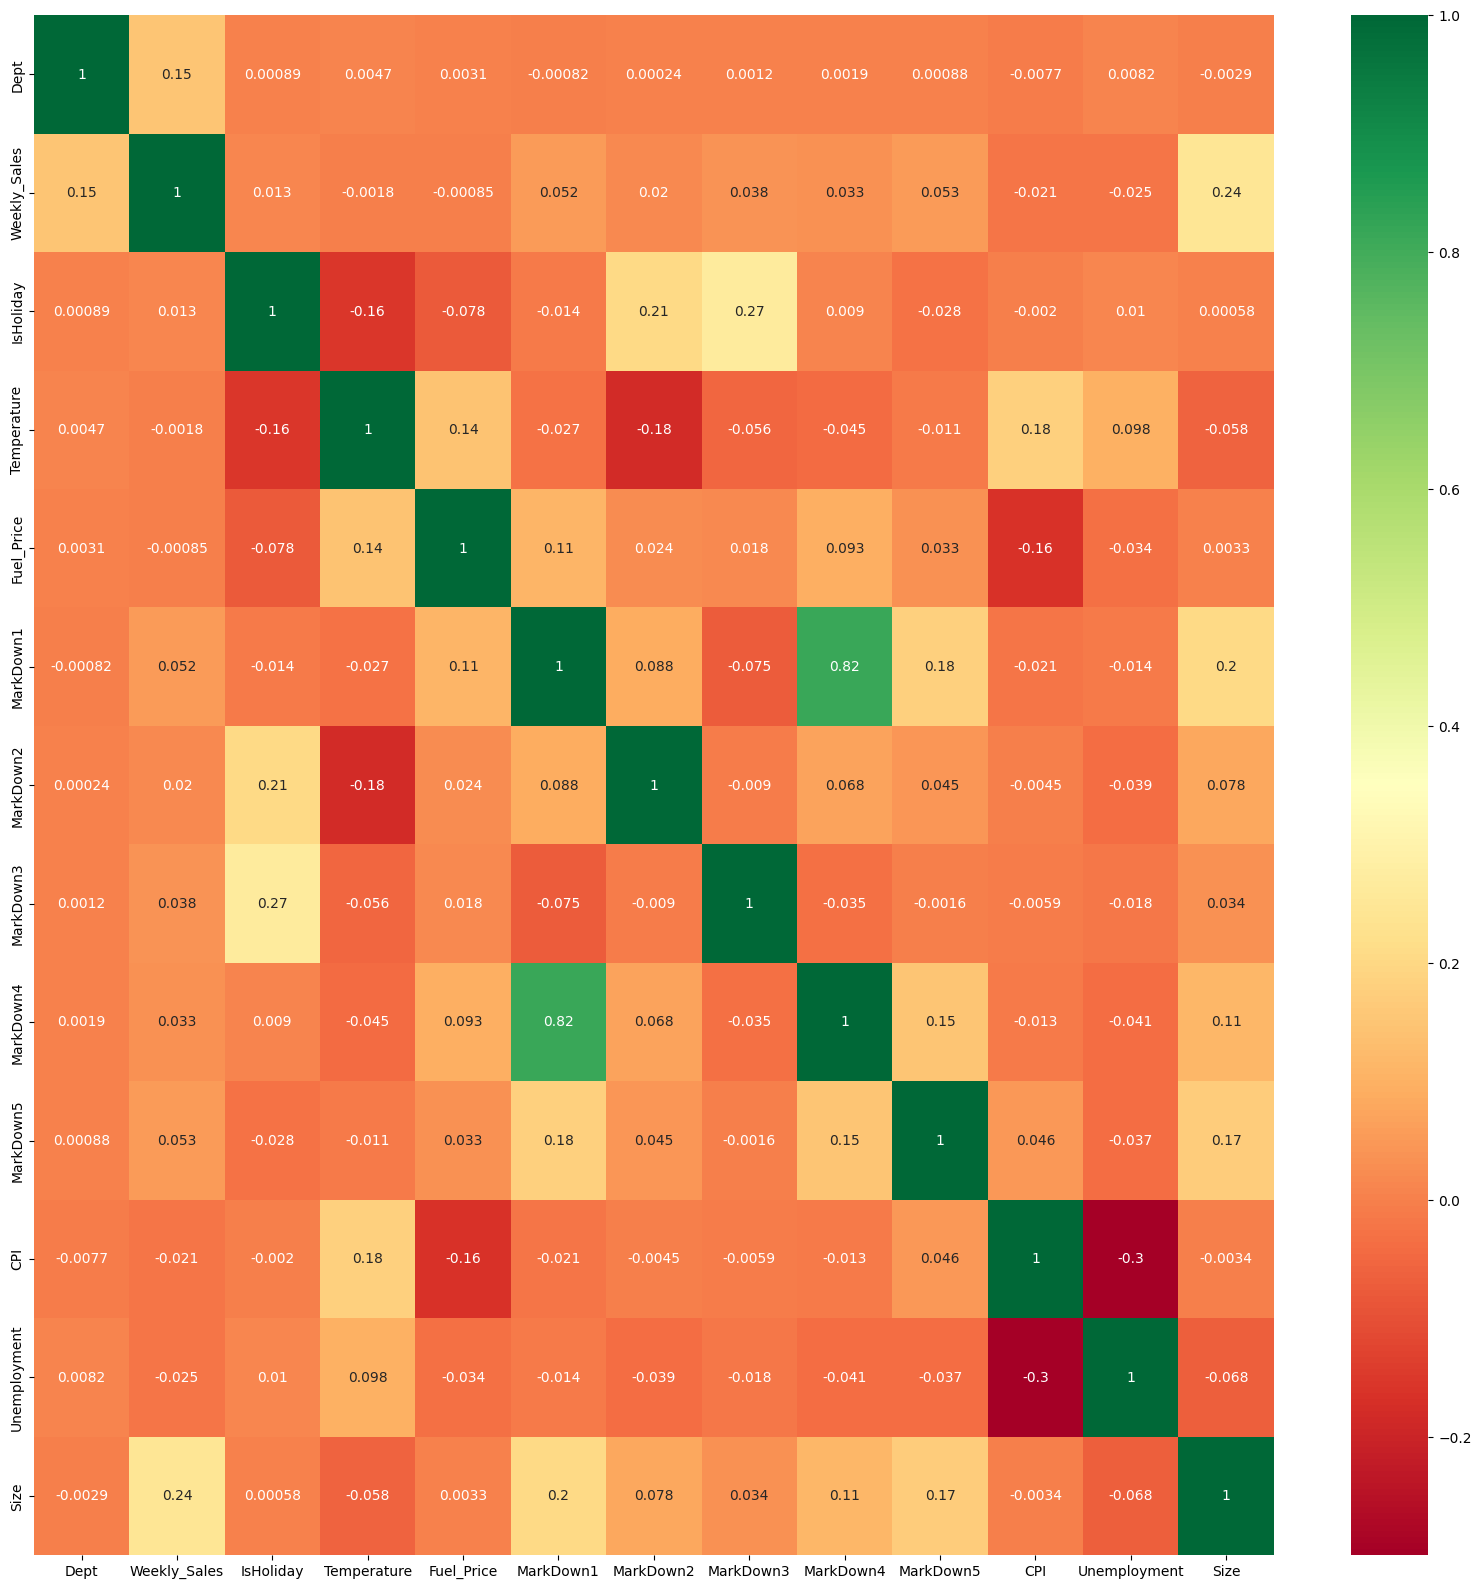

In [16]:
#Plotting Coorelation using Heatmap
plt.figure(figsize=(20,20))
g = sns.heatmap(final_dataset.corr(),annot=True, cmap="RdYlGn")

In [17]:
from sklearn.model_selection import train_test_split
X = final_dataset.drop('Weekly_Sales',axis=1)
y = final_dataset['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
######Feature Importance#######
model = ExtraTreesRegressor()  #This Regression Algorithm will help you in finding out the best features
model.fit(X,y)

ExtraTreesRegressor()

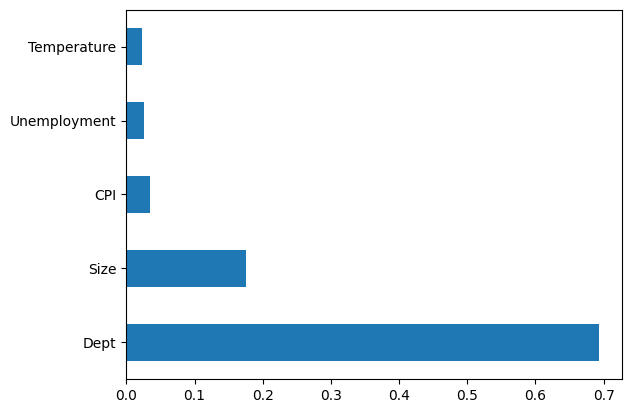

In [19]:
#Plotting the Graph For better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)
y_pred = lr_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

21684.538911434578

In [21]:
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor()
dec_reg.fit(x_train,y_train)
y_pred = dec_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

7518.7691135251625

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
y_pred = rf_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

5538.551687253057

In [23]:
from sklearn.model_selection import cross_val_score

#Getting Cross Validation scores of Models

#For Linear Regression
scores = cross_val_score(lr_reg, x_test, y_test, scoring = 'neg_mean_squared_error',cv = 10)
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std Deviation: ", scores.std())

Scores:  [-4.94500072e+08 -4.53138223e+08 -4.68679558e+08 -5.14365342e+08
 -4.58494419e+08 -4.50798987e+08 -4.52168886e+08 -4.63582290e+08
 -4.87138709e+08 -4.59076656e+08]
Mean:  -470194314.153001
Std Deviation:  20316176.565592956


In [24]:
#For Decision Tree
scores = cross_val_score(dec_reg, x_test, y_test, scoring = 'neg_mean_squared_error',cv = 10)
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std Deviation: ", scores.std())

Scores:  [-1.20443203e+08 -7.14489749e+07 -7.26904626e+07 -9.10290463e+07
 -7.21321737e+07 -1.42507893e+08 -5.82773872e+07 -7.16909123e+07
 -9.99691176e+07 -5.59421713e+07]
Mean:  -85613134.12284005
Std Deviation:  26563821.448920514


In [25]:
#For Random Forest
scores = cross_val_score(rf_reg, x_test[:4000], y_test[:4000], scoring = 'neg_mean_squared_error',cv = 10)
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std Deviation: ", scores.std())

Scores:  [-7.37840300e+07 -1.09580086e+08 -7.17619053e+07 -1.39210717e+08
 -1.15120188e+08 -2.71580127e+08 -6.58273728e+08 -9.13893686e+07
 -1.20271847e+08 -9.53299690e+07]
Mean:  -174630196.51157123
Std Deviation:  170077064.30033538


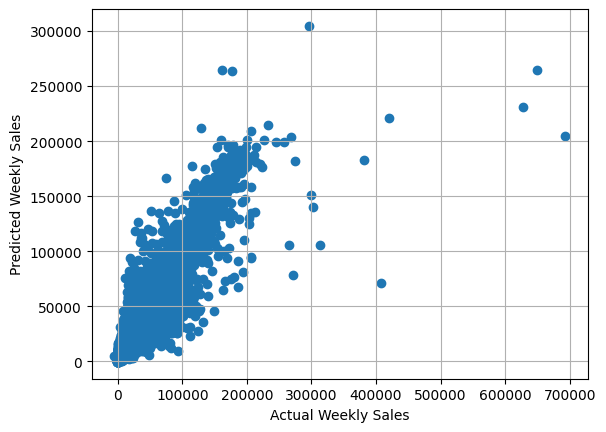

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.grid(True)

In [27]:
#Making a Dataframe for the predicted sales
pred_dataset = pd.DataFrame(np.c_[y_test,y_pred], columns=["Original Sales","Predicted Sales"])
pred_dataset.head(100)

,Original Sales,Predicted Sales
0,3246.77,2712.1172
1,9304.96,7295.1436
2,6211.47,7783.5031
3,1358.30,1954.2885
4,8264.50,9338.3372
...,...,...
95,4719.69,4574.2683
96,838.31,872.1939
97,968.41,9791.9678
98,386.17,172.6950


In [28]:
import sklearn
print("The Accuracy of the model is: ",sklearn.metrics.r2_score(y_test, y_pred)*100)

The Accuracy of the model is:  94.00918077415187


In [29]:
dataset = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
merged_df = pd.merge(dataset, features, on=['Store', 'Date'])
merged_df = pd.merge(merged_df, stores, on='Store')
merged_df.fillna(method='ffill', inplace=True)
merged_df.fillna(method='bfill', inplace=True)
selected_features = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'Size']
X = merged_df[selected_features]
y = merged_df['Weekly_Sales']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)
mse = model.evaluate(X_test, y_test)
print("Test MSE Loss:", mse)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)


Epoch 1/50
10540/10540 - 29s - loss: 673750080.0000 - val_loss: 569012096.0000 - 29s/epoch - 3ms/step
Epoch 2/50
10540/10540 - 30s - loss: 509472512.0000 - val_loss: 507950144.0000 - 30s/epoch - 3ms/step
Epoch 3/50
10540/10540 - 29s - loss: 487369920.0000 - val_loss: 496233024.0000 - 29s/epoch - 3ms/step
Epoch 4/50
10540/10540 - 30s - loss: 483855648.0000 - val_loss: 494880800.0000 - 30s/epoch - 3ms/step
Epoch 5/50
10540/10540 - 29s - loss: 483029376.0000 - val_loss: 494281472.0000 - 29s/epoch - 3ms/step
Epoch 6/50
10540/10540 - 29s - loss: 482718752.0000 - val_loss: 493921696.0000 - 29s/epoch - 3ms/step
Epoch 7/50
10540/10540 - 28s - loss: 482545344.0000 - val_loss: 493791616.0000 - 28s/epoch - 3ms/step
Epoch 8/50
10540/10540 - 34s - loss: 482447328.0000 - val_loss: 493652576.0000 - 34s/epoch - 3ms/step
Epoch 9/50
10540/10540 - 30s - loss: 482361888.0000 - val_loss: 493610592.0000 - 30s/epoch - 3ms/step
Epoch 10/50
10540/10540 - 29s - loss: 482295520.0000 - val_loss: 493695264.0000 - 